![](https://github.com/Ai-Adventures/rmd/blob/master/notebooks/images/logo_full.png?raw=1)

The course is offered by [Ai Adventures](https://aiadventures.in/). The notebooks are created by [Ankur Singh](https://twitter.com/I_ankursingh). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/). Any use for commercial purpose is strictly prohibited.

<a href="https://colab.research.google.com/github/Ai-Adventures/rmd/blob/master/notebooks/03_best_practices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Best Practices in Deep Learning

In this notebook, we will be discussing two very important concepts in Deep Learning:
- Model Complexity (overfitting & underfitting)
- Workflow of Deep Learning Project

Lets start with an example we have already seen.

In [1]:
from tensorflow.keras.datasets import mnist
from keras.utils.np_utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow.keras.backend as K
from tensorflow.keras.regularizers import l2

from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
def get_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  
  X_train = X_train.reshape(-1, 28*28) # reshaping
  X_test = X_test.reshape(-1, 28*28)

  X_train = X_train.astype('float32') # converting to float
  X_test = X_test.astype('float32')

  X_train /= 255.0 # normalizing the values
  X_test /= 255.0

  y_train_cat = to_categorical(y_train) # one-hot encoding the labels
  y_test_cat = to_categorical(y_test)

  return X_train, y_train_cat, X_test, y_test_cat

X_train, y_train_cat, X_test, y_test_cat = get_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
K.clear_session()

model = Sequential()
model.add(Dense(128, input_shape=(28*28,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=50, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 2s 47us/sample - loss: 0.4082 - acc: 0.8851 - val_loss: 0.1968 - val_acc: 0.9423
Epoch 2/50
42000/42000 [==============================] - 2s 42us/sample - loss: 0.1715 - acc: 0.9487 - val_loss: 0.2134 - val_acc: 0.9355
Epoch 3/50
42000/42000 [==============================] - 2s 43us/sample - loss: 0.1215 - acc: 0.9634 - val_loss: 0.1701 - val_acc: 0.9514
Epoch 4/50
42000/42000 [==============================] - 2s 41us/sample - loss: 0.0927 - acc: 0.9712 - val_loss: 0.1174 - val_acc: 0.9649
Epoch 5/50
42000/42000 [==============================] - 2s 40us/sample - loss: 0.0736 - acc: 0.9781 - val_loss: 0.1548 - val_acc: 0.9532
Epoch 6/50
42000/42000 [==============================] - 2s 42us/sample - loss: 0.0609 - acc: 0.9815 - val_loss: 0.1151 - val_acc: 0.9677
Epoch 7/50
42000/42000 [==============================] - 2s 42us/sample - loss: 0.0496 - acc: 0.9853 - val_loss: 0.

In [0]:
def plot_model(h):
  plt.plot(h.history['loss'])
  plt.plot(h.history['val_loss'])
  plt.legend(['Training', 'Validation'])
  plt.title('Accuracy')
  plt.xlabel('Epochs')

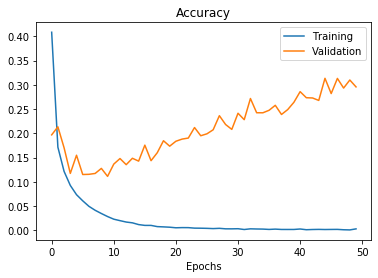

In [7]:
plot_model(h)

### Overfitting & Underfitting
The performance of the model on the held-out validation data always peaked after a few epochs and then began to degrade: the model quickly started to overfit to the training data. Overfitting happens in every machine-learning problem. Learning how to deal with overfitting is essential to mastering machine learning.

The fundamental issue in machine learning is the tension between optimization and generalization. Optimization refers to the process of adjusting a model to get the best performance possible on the training data (the learning in machine learning), whereas generalization refers to how well the trained model performs on data it has never seen before. The goal of the game is to get good generalization, of course, but you don’t control generalization; you can only adjust the model based on its training data.

At the beginning of training, optimization and generalization are correlated: the lower the loss on training data, the lower the loss on test data. While this is happening, your model is said to be underfit: there is still progress to be made; the network hasn’t yet modeled all relevant patterns in the training data. But after a certain number of iterations on the training data, generalization stops improving, and validation metrics stall and then begin to degrade: the model is starting to overfit. That is, it’s beginning to learn patterns that are specific to the training data but that are misleading or irrelevant when it comes to new data.

To prevent a model from learning misleading or irrelevant patterns found in the training data, the best solution is to get more training data. A model trained on more data will naturally generalize better. When that isn’t possible, the next-best solution is to modulate the quantity of information that your model is allowed to store or to add constraints on what information it’s allowed to store. If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well. The processing of fighting overfitting this way is called **regularization**.

In [0]:
## Small model - Underfit
model_s = Sequential()
model_s.add(Dense(64, input_shape=(28*28,), activation='relu'))
model_s.add(Dense(10, activation='softmax'))
model_s.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Medium model - good model
model_m = Sequential()
model_m.add(Dense(128, input_shape=(28*28,), activation='relu'))
model_m.add(Dense(64, activation='softmax'))
model_m.add(Dense(32, activation='softmax'))
model_m.add(Dense(10, activation='softmax'))
model_m.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Large model - overfit
model_l = Sequential()
model_l.add(Dense(256, input_shape=(28*28,), activation='relu'))
model_l.add(Dense(128, activation='softmax'))
model_l.add(Dense(64, activation='softmax'))
model_l.add(Dense(32, activation='softmax'))
model_l.add(Dense(10, activation='softmax'))
model_l.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

def evaluate_model(model):
  h = model.fit(X_train, y_train_cat, batch_size=128, epochs=50, verbose=0, validation_split=0.3)
  plot_model(h)

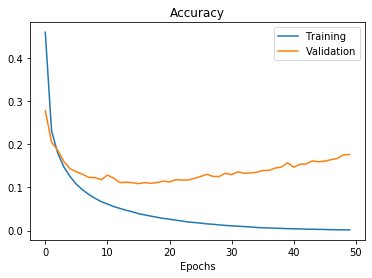

In [9]:
evaluate_model(model_s) # Underfitting

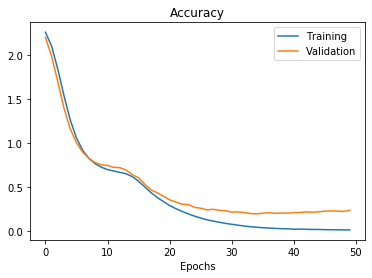

In [10]:
evaluate_model(model_m) # Good model

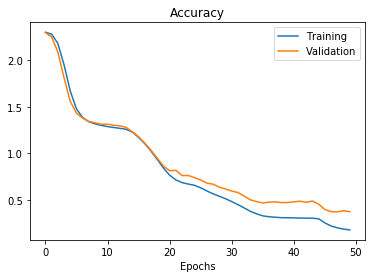

In [11]:
evaluate_model(model_l) # Overfitting

##### Dropout


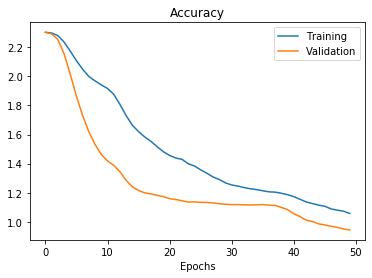

In [12]:
## Large model with dropout
model_ld = Sequential()
model_ld.add(Dense(256, input_shape=(28*28,), activation='relu'))
model_ld.add(Dropout(0.5))
model_ld.add(Dense(128, activation='softmax'))
model_ld.add(Dropout(0.5))
model_ld.add(Dense(64, activation='softmax'))
model_ld.add(Dropout(0.5))
model_ld.add(Dense(32, activation='softmax'))
model_ld.add(Dropout(0.5))
model_ld.add(Dense(10, activation='softmax'))
model_ld.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

evaluate_model(model_ld) 

##### Regularization

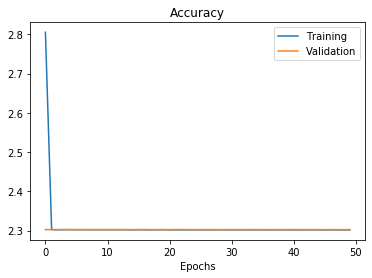

In [13]:
## Large model with regularization
model_lr = Sequential()
model_lr.add(Dense(256, input_shape=(28*28,), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_lr.add(Dropout(0.5))
model_lr.add(Dense(128, activation='softmax', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_lr.add(Dropout(0.5))
model_lr.add(Dense(64, activation='softmax', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_lr.add(Dropout(0.5))
model_lr.add(Dense(32, activation='softmax', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_lr.add(Dropout(0.5))
model_lr.add(Dense(10, activation='softmax'))
model_lr.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

evaluate_model(model_lr)

To summarize, these are the most common ways to prevent overfitting in neural networks:

- Get more training data.
- Reduce the capacity of the network.
- Add weight regularization.
- Add dropout.

#### Workflow of Deep Learning
I’ll present a blueprint that you can use to attack and solve any machine-learning problem. The blueprint ties together the concepts you’ve learned so far in the workshop:

1. Defining the problem and assembling a dataset
2. Choosing a measure of success
3. Deciding on an evaluation protocol
4. Preparing your data
5. Developing a model that does better than a baseline
6. Scaling up: developing a model that overfits
7. Regularizing your model and tuning your hyperparameters


